<h1 align="center">Zoo classification project of Group 9</h1>

<br>
<hr>
<h4 align="center">
Course: Informatic Engineering 2021/2022 <br>
Teacher: António Castro
</h4>
<p align="center">***************************************</p>
<h4 align="center">
Developed by:<br>
Euler Junior<br>
Jesus Faria<br>
Pedro Campota<br>
Rúben Oliveira<br>
</h4>

In [620]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

%matplotlib inline

## Read CSV data

In [621]:
# import CSV dataset
animalDataset = pd.read_csv('zoo.csv')

# remove the animal name from printed list
# animalDataset.drop('animal_name', axis=1, inplace=True)

# call list to view all attributes
animalDataset

# animalDataset.animal_name if we want to see by attribute
# animalDataset.animal_name

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [622]:
# check dimensions of the database
print(animalDataset.shape)

(101, 18)


In [623]:
# peaking the data
print(animalDataset.head(20))

   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0     aardvark     1         0     0     1         0        0         1   
1     antelope     1         0     0     1         0        0         0   
2         bass     0         0     1     0         0        1         1   
3         bear     1         0     0     1         0        0         1   
4         boar     1         0     0     1         0        0         1   
5      buffalo     1         0     0     1         0        0         0   
6         calf     1         0     0     1         0        0         0   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
9         cavy     1         0     0     1         0        0         0   
10     cheetah     1         0     0     1         0        0         1   
11     chicken     0         1     1     0         1        0         0   
12        chub     0     

In [624]:
# class distribution
print(animalDataset.groupby('class_type').size())

class_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
dtype: int64


In [625]:
# show statistics
animalDataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## Pre-processing data and ploting
* check for null values
* check for duplicated records
* Plot animals class type
* Plot charts and histograms

In [626]:
# sum and check dataset for null values
animalDataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [627]:
# print existing class type
print(animalDataset.class_type)

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64


In [628]:
# non duplicated class type
print(animalDataset.class_type.unique())

[1 4 2 7 6 5 3]


In [629]:
# check for duplicated records in dataset
isduplicated = animalDataset.animal_name.value_counts()
isduplicated

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal_name, Length: 100, dtype: int64

In [630]:
 # we can see above that we have frog duplicated
duplicatedAnimal = animalDataset.loc[animalDataset['animal_name'] == 'frog']

# show the duplicated records
duplicatedAnimal

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [631]:
# as we can see, the dataset has two frog records that the only difference is which one it's venomous OR not
# here we have to give a different name to one of the frogs so our program can distinguish them
animalDataset['animal_name'][(animalDataset.venomous == 1) & animalDataset.animal_name == 'frog'] = "venomous_frog"

C:\Users\RAOLIV~1\AppData\Local\Temp/ipykernel_11676/1927792466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animalDataset['animal_name'][(animalDataset.venomous == 1) & animalDataset.animal_name == 'frog'] = "venomous_frog"


In [632]:
# now we join the animals dataset with the class of them
animalsClass = pd.read_csv('class.csv')
animalsAndClass = pd.merge(animalDataset, animalsClass, how='left', left_on='class_type', right_on='Class_Number')
animalsAndClass

# the results will give us a table in which each animal is categorized by its class

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


C:\Users\raOliveira\anaconda3\envs\tp_grupo9_zoo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


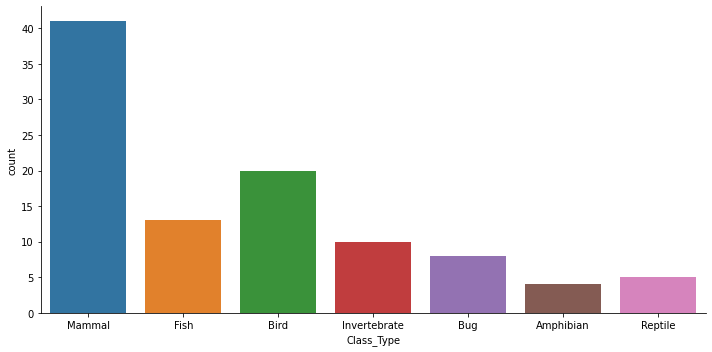

In [633]:
# using seaborn library let's plot the results
# counting how many animals we have in each class type
sns.catplot('Class_Type', data=animalsAndClass, kind="count", height=5, aspect=2)

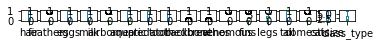

In [634]:
# box and whisker plots
animalDataset.plot(kind='box', subplots=True, layout=(17,17), sharex=False, sharey=False)
plt.show()

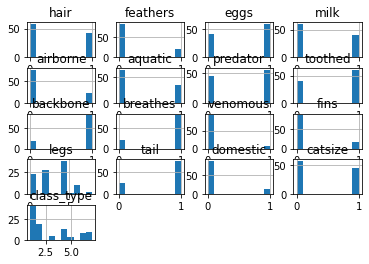

In [635]:
# histograms
animalDataset.hist()
plt.show()

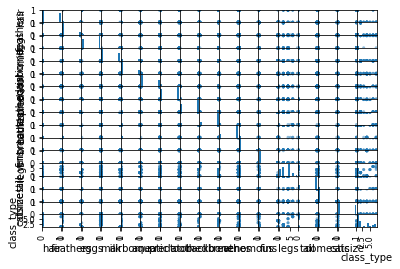

In [636]:
# scatter plot matrix
scatter_matrix(animalDataset)
plt.show()

## Evaluating algorithms
* Separate out a validation dataset
* Set-up the test harness to use 10-fold cross validation
* Build multiple different models to predict species from flower measurements
* Select the best model
* Accuracy

In [637]:
# split train test data into 70/30
X = animalDataset.iloc[:,1:17]
y = animalDataset.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## Training and Testing The Data
* Decision Tree
* Support Vector Machine
* K-Nearest Neighbors

In [638]:
# declare the model
clf = KNeighborsClassifier(n_neighbors=3)

# train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)

scrs = []

# get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scrs.append(score)

In [639]:
# use cross validation score since this is a small size dataset
# get cross validation score of K-Nearest Neighbors
cv_scores = [] # store cross vadidation score of all the algorithms.

score_knn=cross_val_score(clf, X,y, cv=4)

print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.92 (+/- 0.06) with k value equals to 3


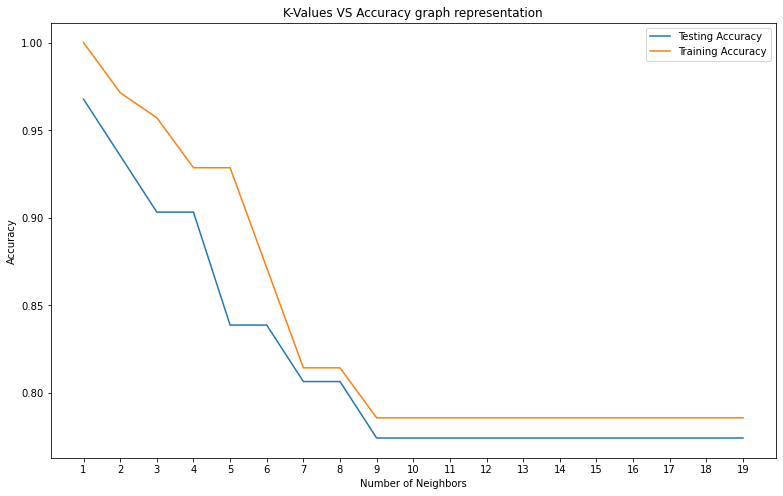

Best accuracy is 0.967741935483871 with K = 1


In [640]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit with knn
    knn.fit(X_train,y_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))

## Support Vector Machine(SVM)

In [641]:
# declare the model
svm = SVC(kernel='linear', C=0.2, random_state=0)

# train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# get Accuracy Score
score = accuracy_score(y_pred_svm,y_test)
scrs.append(score)

In [642]:
score_svm=cross_val_score(svm, X,y, cv=4)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.93 (+/- 0.09)


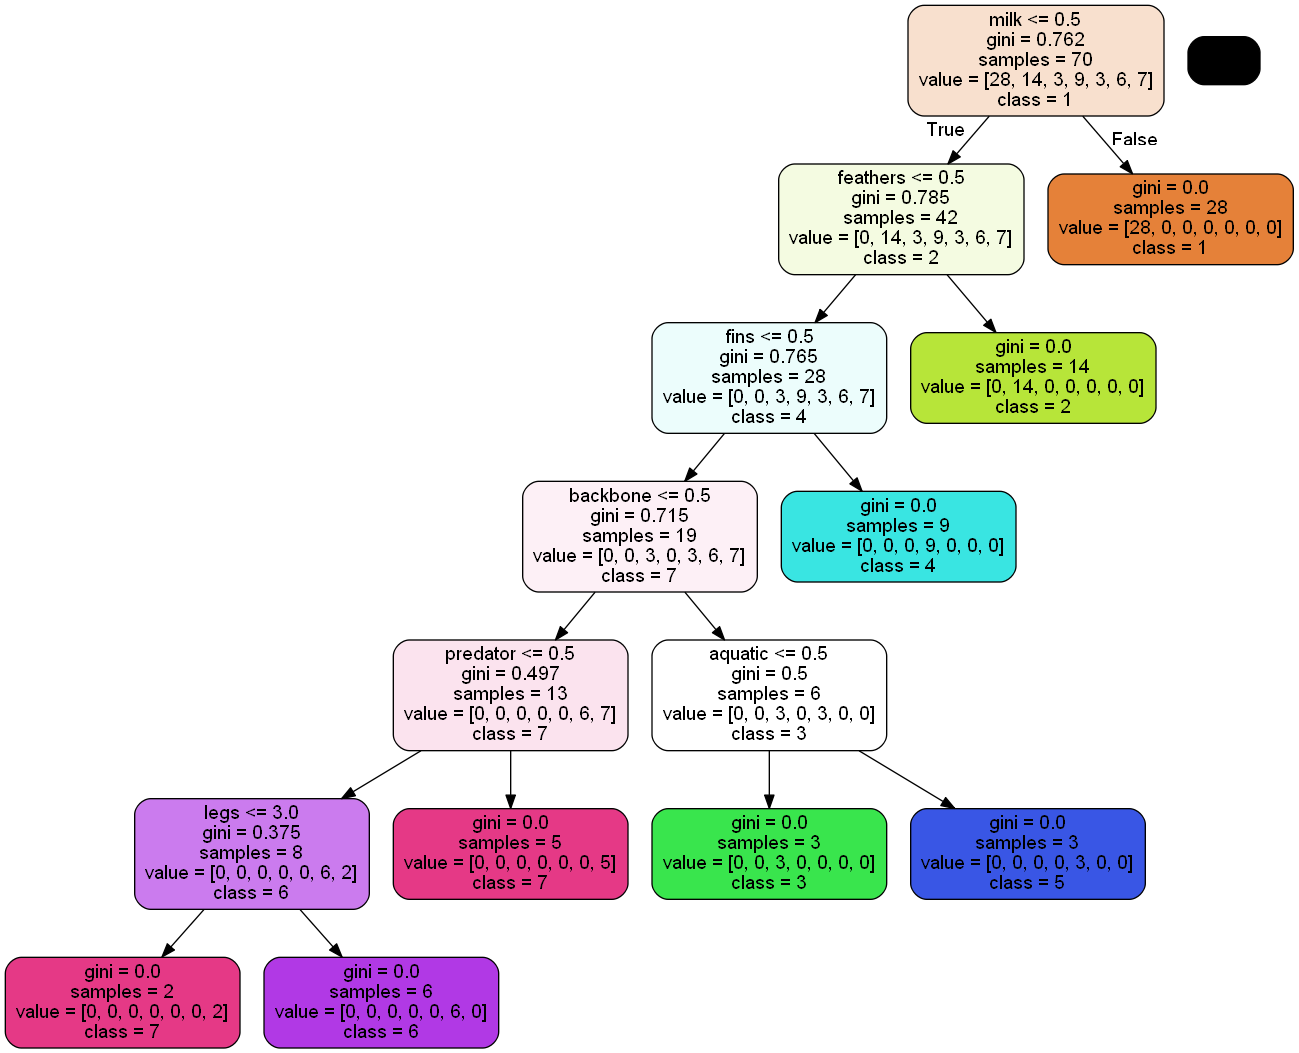

In [643]:
# declare the model
cf = DecisionTreeClassifier(random_state = 0,criterion='gini')
# train the model
cf.fit(X_train, y_train)

y_pred_DecisionTreeClassifier = cf.predict(X_test)


scr = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
scrs.append(scr)

global tree
tree = []
tree = cf

dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None)

graph = graph_from_dot_data(dot_data)

Image(graph.create_png())

In [644]:
score_tree=cross_val_score(cf, X,y, cv=4)
score_tree

array([0.96153846, 0.92      , 0.92      , 0.92      ])

In [645]:
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.93 (+/- 0.04)


## Random Forest Classifier

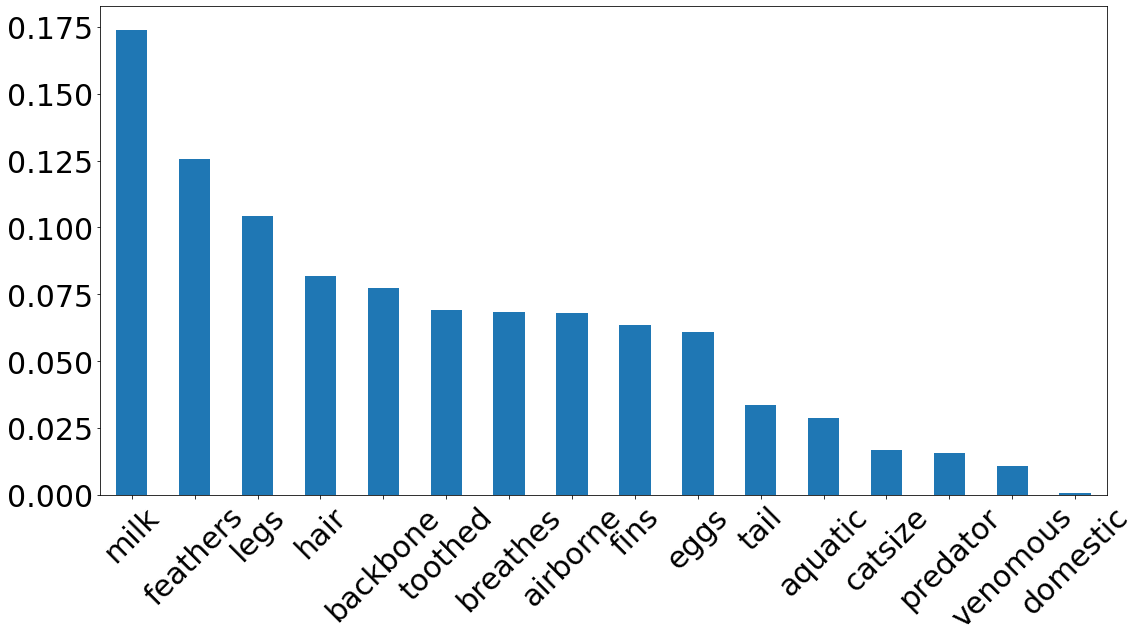

In [646]:
# declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
# get Accuracy Score
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
scrs.append(score)

global importances
# get the feature importances
importances = []
importances = clf.feature_importances_


# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# show the plot
plt.tight_layout()
plt.show()

In [647]:
# get cross validation score of random forest model
score_forest=cross_val_score(clf, X,y, cv=4)
# score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

Random Forest Accuracy: 0.95 (+/- 0.09)


## Comparision of All 4 Algorithm

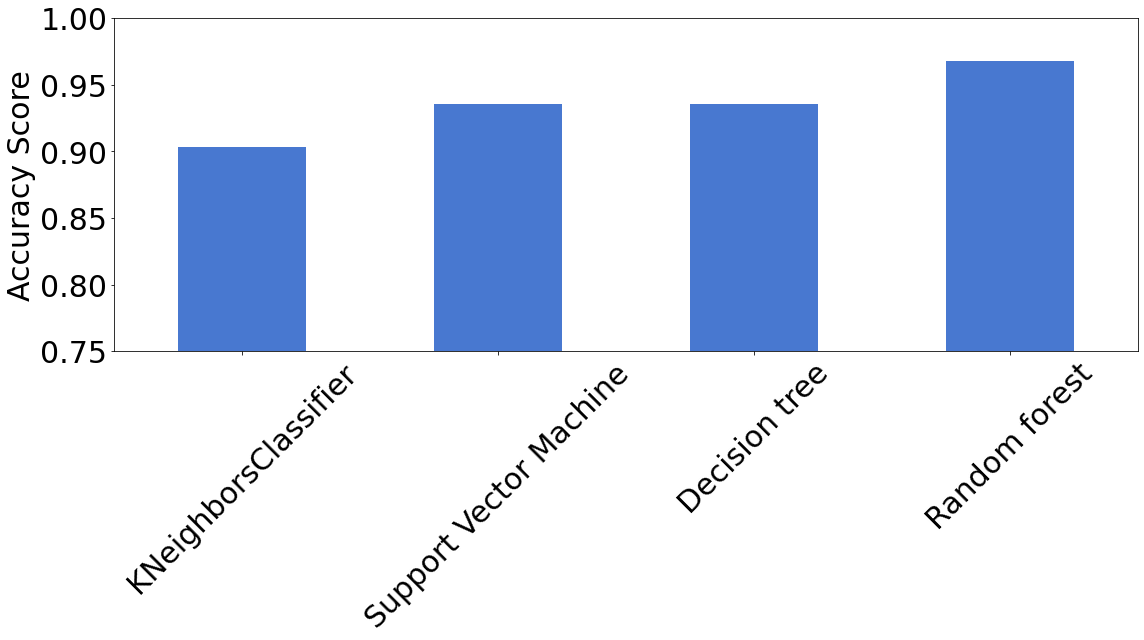

In [648]:
# convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels
Acc_scores = pd.Series(scrs, ['KNeighborsClassifier','Support Vector Machine','Decision tree', 'Random forest'])

current_palette = sns.color_palette("muted", n_colors=4)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
# colors = np.random.randint(0,5,5)

# make the bar Plot from f_importances
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)

plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# show the plot
plt.tight_layout()
plt.show()

<h1 align'center'>==================================================================================</h1>
<h1 align='center'>Using another approach tests</h1>

In [649]:
# spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.899758 (0.021401)
LDA: 0.899758 (0.021401)
KNN: 0.813406 (0.043554)
CART: 0.971618 (0.020082)
NB: 0.971618 (0.020082)
SVM: 0.856280 (0.042700)


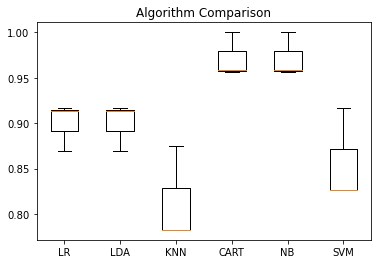

In [650]:
# compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Predictions

In [651]:
# make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [652]:
# evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9032258064516129
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.90        31
   macro avg       0.66      0.71      0.68        31
weighted avg       0.83      0.90      0.86        31



C:\Users\raOliveira\anaconda3\envs\tp_grupo9_zoo\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raOliveira\anaconda3\envs\tp_grupo9_zoo\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raOliveira\anaconda3\envs\tp_grupo9_zoo\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta